# Pymaceuticals Inc.
---

### Analysis 

-My first obeservation is that Capomulin is an effective drug for treating the tumors. Mouse s185 tumor volume decreased when taking the drug.
-Another observation is that we can see a positive correlation between mouse weight and the average tumor volume, meaning the more a mouse weighs the higher the tumor volume is and the drug is less effective.
-Lastly, the data is consistent considering only 1 drug had an outlier.  
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_full_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")

# Display the data table for preview
mouse_full_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(mouse_full_data["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_full_data.loc[mouse_full_data.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_full_data.loc[mouse_full_data["Mouse ID"]!="g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_data["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

tumor_median = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# # Assemble the resulting series into a single summary DataFrame.
tumor = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                      "Median Tumor Volume":tumor_median,
                      "Tumor Volume Variance":tumor_variance,
                      "Tumor Volume Std. Dev.":tumor_std,
                      "Tumor Volume Std. Err.":tumor_sem})
tumor

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_2 = clean_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
tumor_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

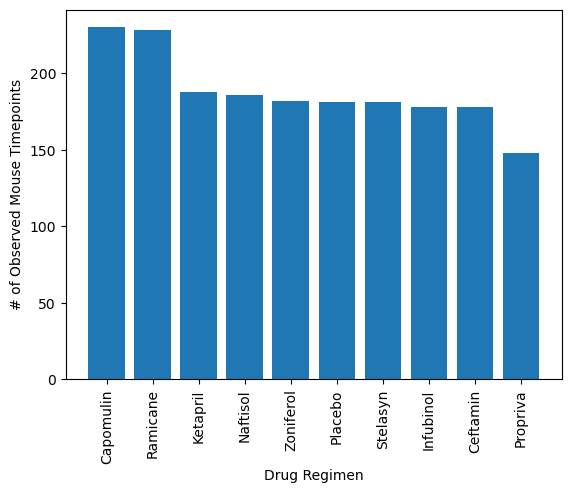

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

counts = clean_data["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

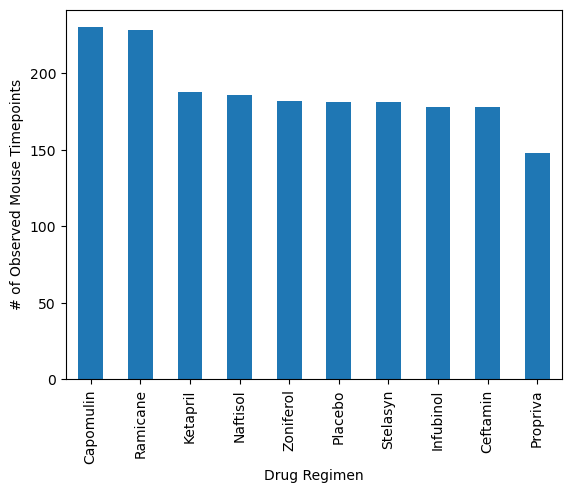

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data["Drug Regimen"].value_counts()

counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

array([<Axes: ylabel='Sex'>], dtype=object)

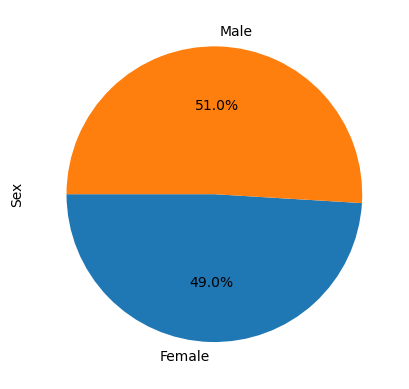

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data.groupby(["Sex"])["Sex"].count()

gender.plot.pie(startangle=180,autopct="%1.1f%%",subplots=True)


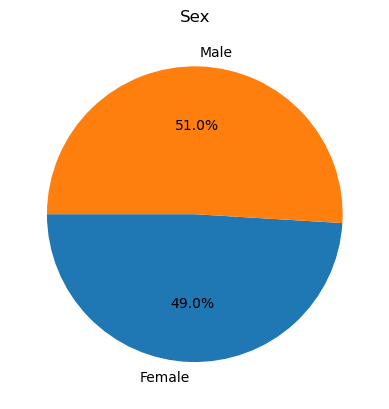

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_data.groupby(["Sex"])["Sex"].count()
labels =["Female","Male"]
plt.pie(gender,labels=labels,startangle=180,autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = pd.DataFrame(clean_data.groupby(["Mouse ID"])["Timepoint"].max())
final_tumor_volume
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(final_tumor_volume,clean_data,on=("Mouse ID","Timepoint"))
final_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vols = final_tumor.loc[final_tumor['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_vol_data.append(final_vols)

    # Determine outliers using upper and lower bounds
    quartiles = final_vols.quantile([.25,.75])     
    upperq = quartiles[.75]
    lowerq = quartiles[.25]
    IQR = upperq - lowerq
    lower_bound = lowerq - (1.5 * IQR)
    upper_bound = upperq + (1.5 * IQR)
    
    outliers = final_vols.loc[(final_vols < lower_bound) | (final_vols > upper_bound)]
    print(f"{drug} {outliers}")



Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


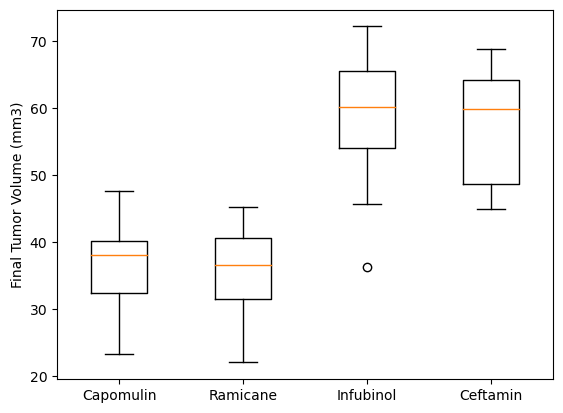

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

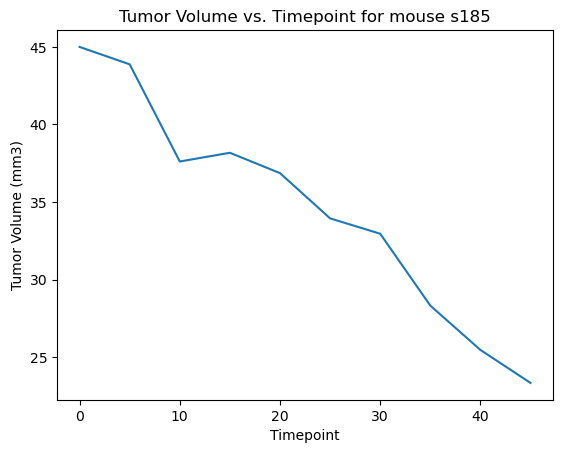

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_data.loc[clean_data['Drug Regimen']== "Capomulin"]
capomulin_mice

mouse = capomulin_mice.loc[capomulin_mice['Mouse ID']== 's185']
mouse

plt.plot(mouse["Timepoint"],mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint for mouse s185")
plt.show()

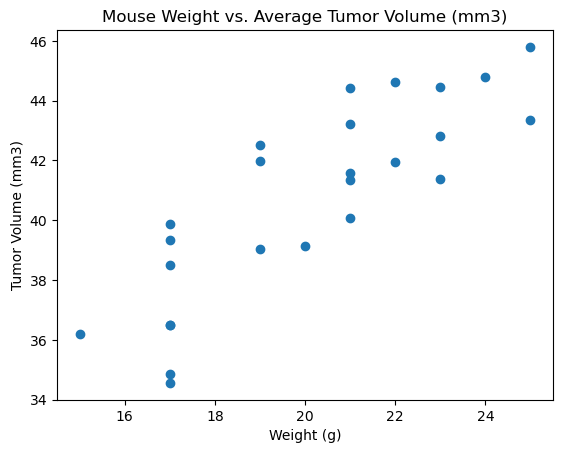

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = capomulin_mice.groupby(["Mouse ID"])[["Tumor Volume (mm3)","Weight (g)"]].mean()
avg_tumor_vol




plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Mouse Weight vs. Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84 


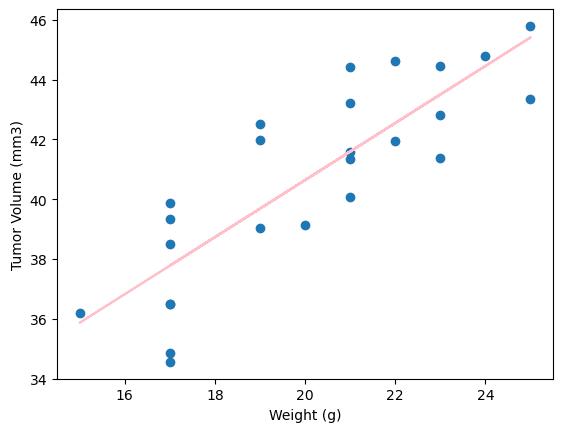

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor = round(st.pearsonr(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {cor} ")
model=st.linregress(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])

y_line = avg_tumor_vol["Weight (g)"] * model[0] + model[1]

plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])
plt.plot(avg_tumor_vol["Weight (g)"],y_line,color="pink")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)") 
plt.show()


In [61]:
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [62]:
model[0]

0.9544396890241049

In [63]:
model[1]

21.552160532685008